 Implementation of PCA with ANN algorithm for
Face recognition



In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import os
import cv2

dir_name = "/content/drive/MyDrive/dataset/faces"
y = []
X = []
target_names = []
person_id = 0
h = w = 300
n_samples = 0
class_names = []

In [2]:
for person_name in os.listdir(dir_name):
    dir_path = os.path.join(dir_name, person_name)
    class_names.append(person_name)
    for image_name in os.listdir(dir_path):
        image_path = os.path.join(dir_path, image_name)
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h, w))
        v = resized_image.flatten()
        X.append(v)
        n_samples += 1
        y.append(person_id)
        target_names.append(person_name)
    person_id += 1

y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
n_classes = target_names.shape[0]

print("Number of samples:", n_samples)
print("n_features:", n_features)
print("n_classes:", n_classes)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

Number of samples: 450
n_features: 90000
n_classes: 450


In [3]:
# Perform PCA to reduce dimensionality
n_components = 100
pca = PCA(n_components=n_components, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [4]:
# Train a backpropagation neural network classifier
mlp = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, max_iter=300, random_state=42)
mlp.fit(X_train_pca, y_train)

# Evaluate the accuracy of the model on the test set
accuracy = mlp.score(X_test_pca, y_test)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 0.7699115044247787


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


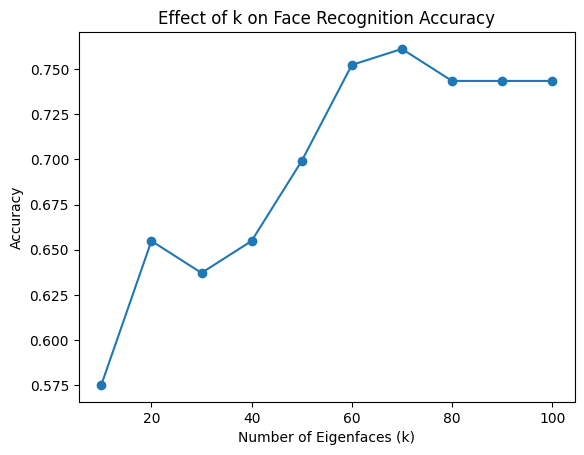

In [5]:
# Task a) Changing the value of k and studying its effect on classification accuracy
k_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
accuracy_values = []
for k in k_values:
    pca = PCA(n_components=k, whiten=True).fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    mlp = MLPClassifier(hidden_layer_sizes=(1024,), batch_size=256, max_iter=300, random_state=42)
    mlp.fit(X_train_pca, y_train)
    accuracy = mlp.score(X_test_pca, y_test)
    accuracy_values.append(accuracy)

# Plotting the accuracy vs. k graph
plt.figure()
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('Number of Eigenfaces (k)')
plt.ylabel('Accuracy')
plt.title('Effect of k on Face Recognition Accuracy')
plt.show()


In [6]:
num_imposters = 10
imposters_X_test = X_train[:num_imposters]
imposters_y_test = y_train[:num_imposters]

# Now, apply PCA to the imposters as well
imposters_X_test_pca = pca.transform(imposters_X_test)

# Now, append the imposters to the original test set
X_test_imposters_combined = np.vstack((X_test_pca, imposters_X_test_pca))
y_test_imposters_combined = np.concatenate((y_test, imposters_y_test))

# Evaluate the recognition performance on the combined test set (including imposters)
accuracy_imposters = mlp.score(X_test_imposters_combined, y_test_imposters_combined)
print("Accuracy on the combined test set with imposters:", accuracy_imposters)


Accuracy on the combined test set with imposters: 0.7642276422764228


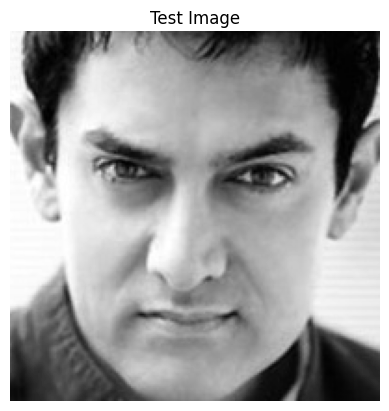

Predicted Person ID: 0
Predicted Person Name: Aamir


In [7]:
# Load the new test image
test_image_path = "/content/drive/MyDrive/dataset/faces/Aamir/face_101.jpg"
test_img = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
resized_test_image = cv2.resize(test_img, (h, w))
test_vector = resized_test_image.flatten()

# Subtract the mean face to obtain the mean-aligned test face data
mean_aligned_test_vector = test_vector - pca.mean_

# Project the mean-aligned test face onto the eigenfaces to obtain the projected test face
test_projection = pca.transform([mean_aligned_test_vector])

# Use the trained neural network to predict the identity of the test face
predicted_person_id = mlp.predict(test_projection)[0]
predicted_person_name = target_names[predicted_person_id]

# Display the test image
plt.imshow(test_img, cmap='gray')
plt.title("Test Image")
plt.axis('off')
plt.show()

# Display the predicted person's name
print("Predicted Person ID:", predicted_person_id)
print("Predicted Person Name:", predicted_person_name)
